In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

plt.rcParams['figure.figsize'] = (12, 9)

In [217]:
# Importing scraped data
df = pd.read_csv("meta_stocks_.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400
...,...,...,...,...,...,...,...
1567,2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200
1568,2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300
1569,2023-03-29,203.559998,205.720001,202.539993,205.350006,205.350006,18851100
1570,2023-03-30,203.380005,208.089996,202.820007,207.839996,207.839996,22608300


In [218]:
# checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [219]:
# checking for duplicate values
df.duplicated().sum()

0

In [220]:
# checking for extreme stock prices(higher prices)
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
boundary

[49.946250915527386, 353.6562423706054]

In [221]:
extreme_prices = df[(df['Adj Close'] < boundary[0]) | (df['Adj Close'] > boundary[1])]
extreme_prices

,Date,Open,High,Low,Close,Adj Close,Volume
1128,2021-06-28,342.459991,358.140015,341.769989,355.640015,355.640015,29156100
1131,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
1132,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
1146,2021-07-23,360.910004,375.329987,357.190002,369.790009,369.790009,33694300
1147,2021-07-26,369.579987,374.440002,368.220001,372.459991,372.459991,14925200
1148,2021-07-27,371.910004,373.149994,364.549988,367.809998,367.809998,15705400
1149,2021-07-28,374.559998,377.549988,366.929993,373.279999,373.279999,29676900
1150,2021-07-29,361.000000,365.519989,356.739990,358.320007,358.320007,33413200
1151,2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15976200
1154,2021-08-04,352.420013,360.480011,351.510010,358.920013,358.920013,14180600


In [222]:
# highest stock closing price till date from 2017
df[df['Adj Close'] == df['Adj Close'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
1177,2021-09-07,375.880005,382.959991,373.149994,382.179993,382.179993,10793800


In [223]:
# lowest stock closing price till date from 2017
df[df['Adj Close'] == df['Adj Close'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume
1470,2022-11-03,90.080002,90.459999,88.410004,88.910004,88.910004,60664000


In [224]:
df['Date'].min()

'2017-01-03'

In [225]:
df['Date'].max()

'2023-03-31'

In [226]:
len(df['Date'].unique())

1572

## Visualization of data

<AxesSubplot: >

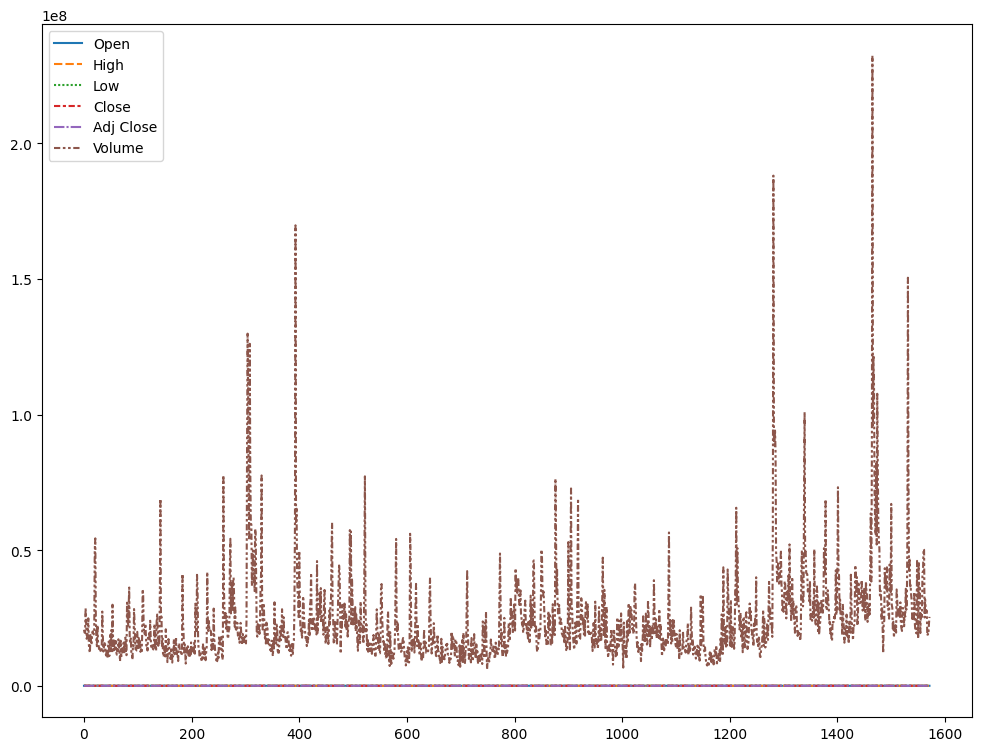

In [227]:
sns.lineplot(data=df)

<AxesSubplot: xlabel='Date', ylabel='Adj Close'>

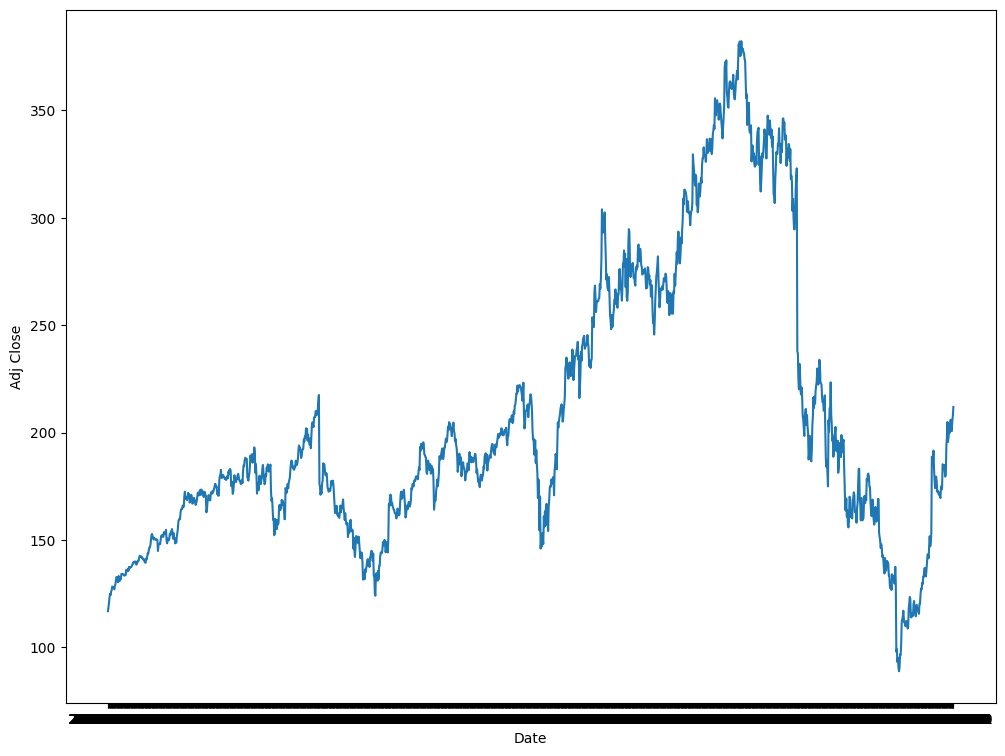

In [228]:
sns.lineplot(data=df, x="Date", y="Adj Close")

<AxesSubplot: ylabel='Adj Close'>

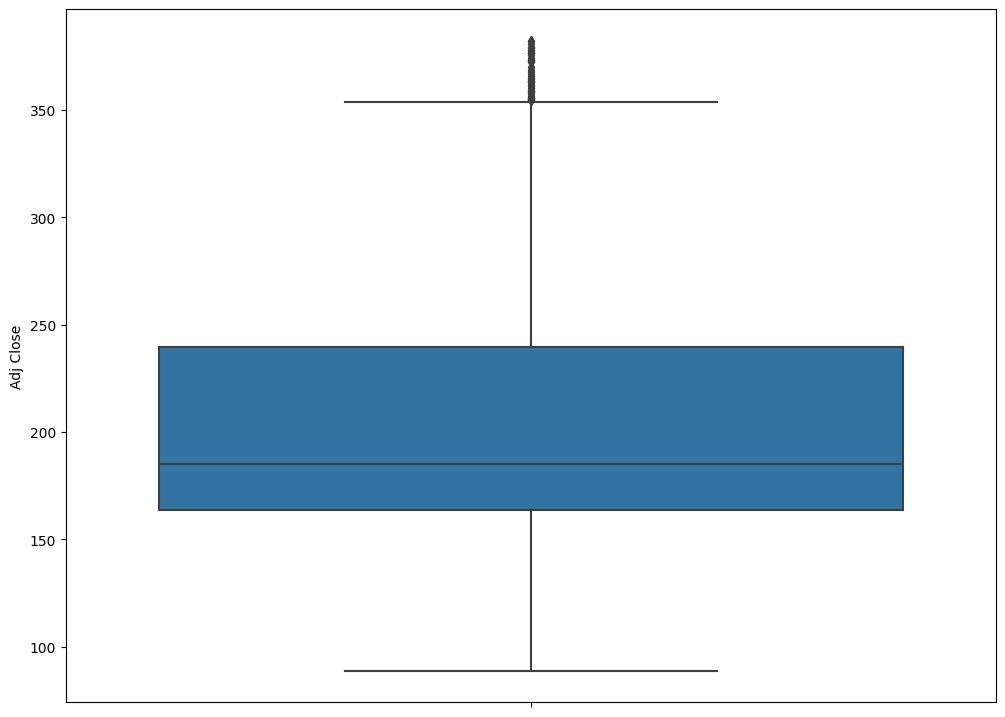

In [229]:
sns.boxplot(y='Adj Close', data=df)

<AxesSubplot: ylabel='Close'>

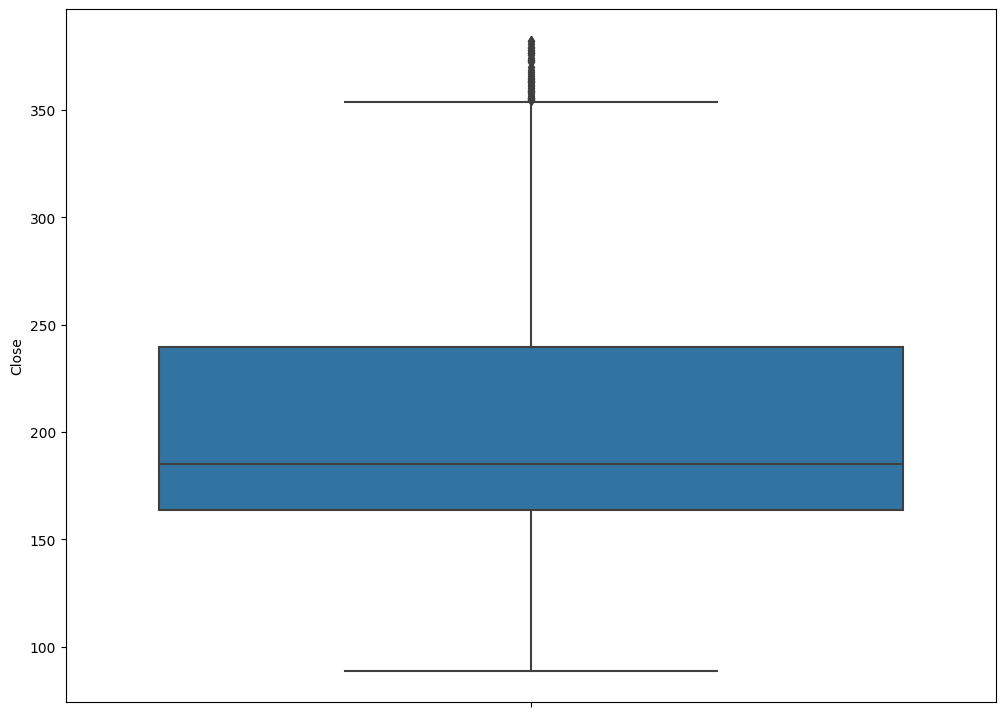

In [230]:
sns.boxplot(y='Close', data=df)

<AxesSubplot: ylabel='Volume'>

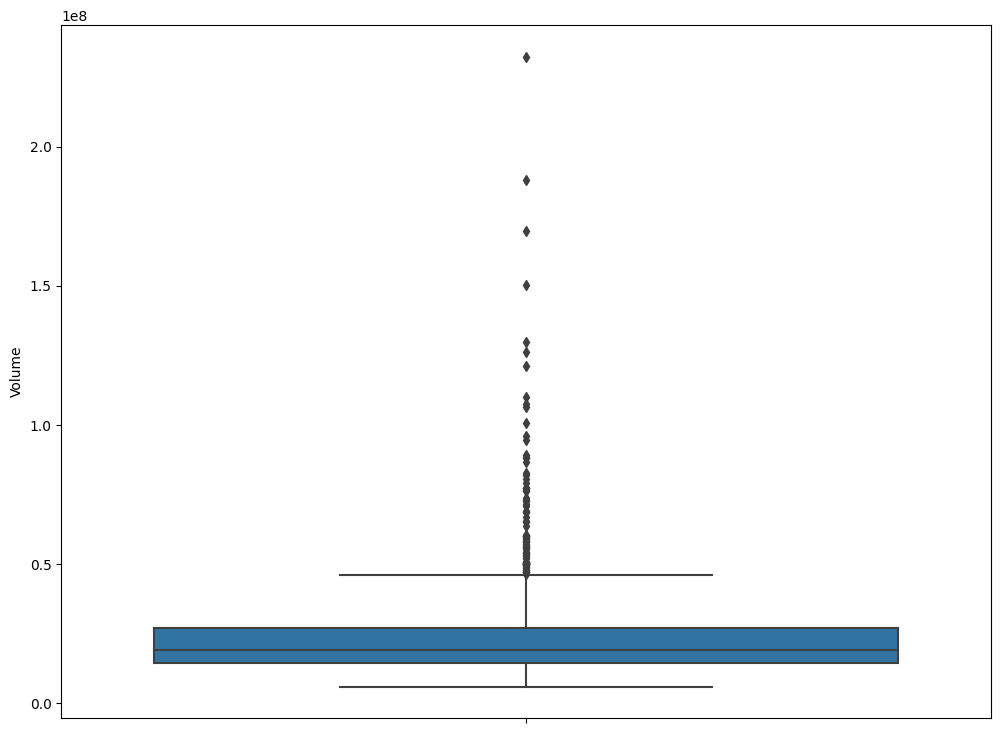

In [231]:
sns.boxplot(y='Volume', data=df)

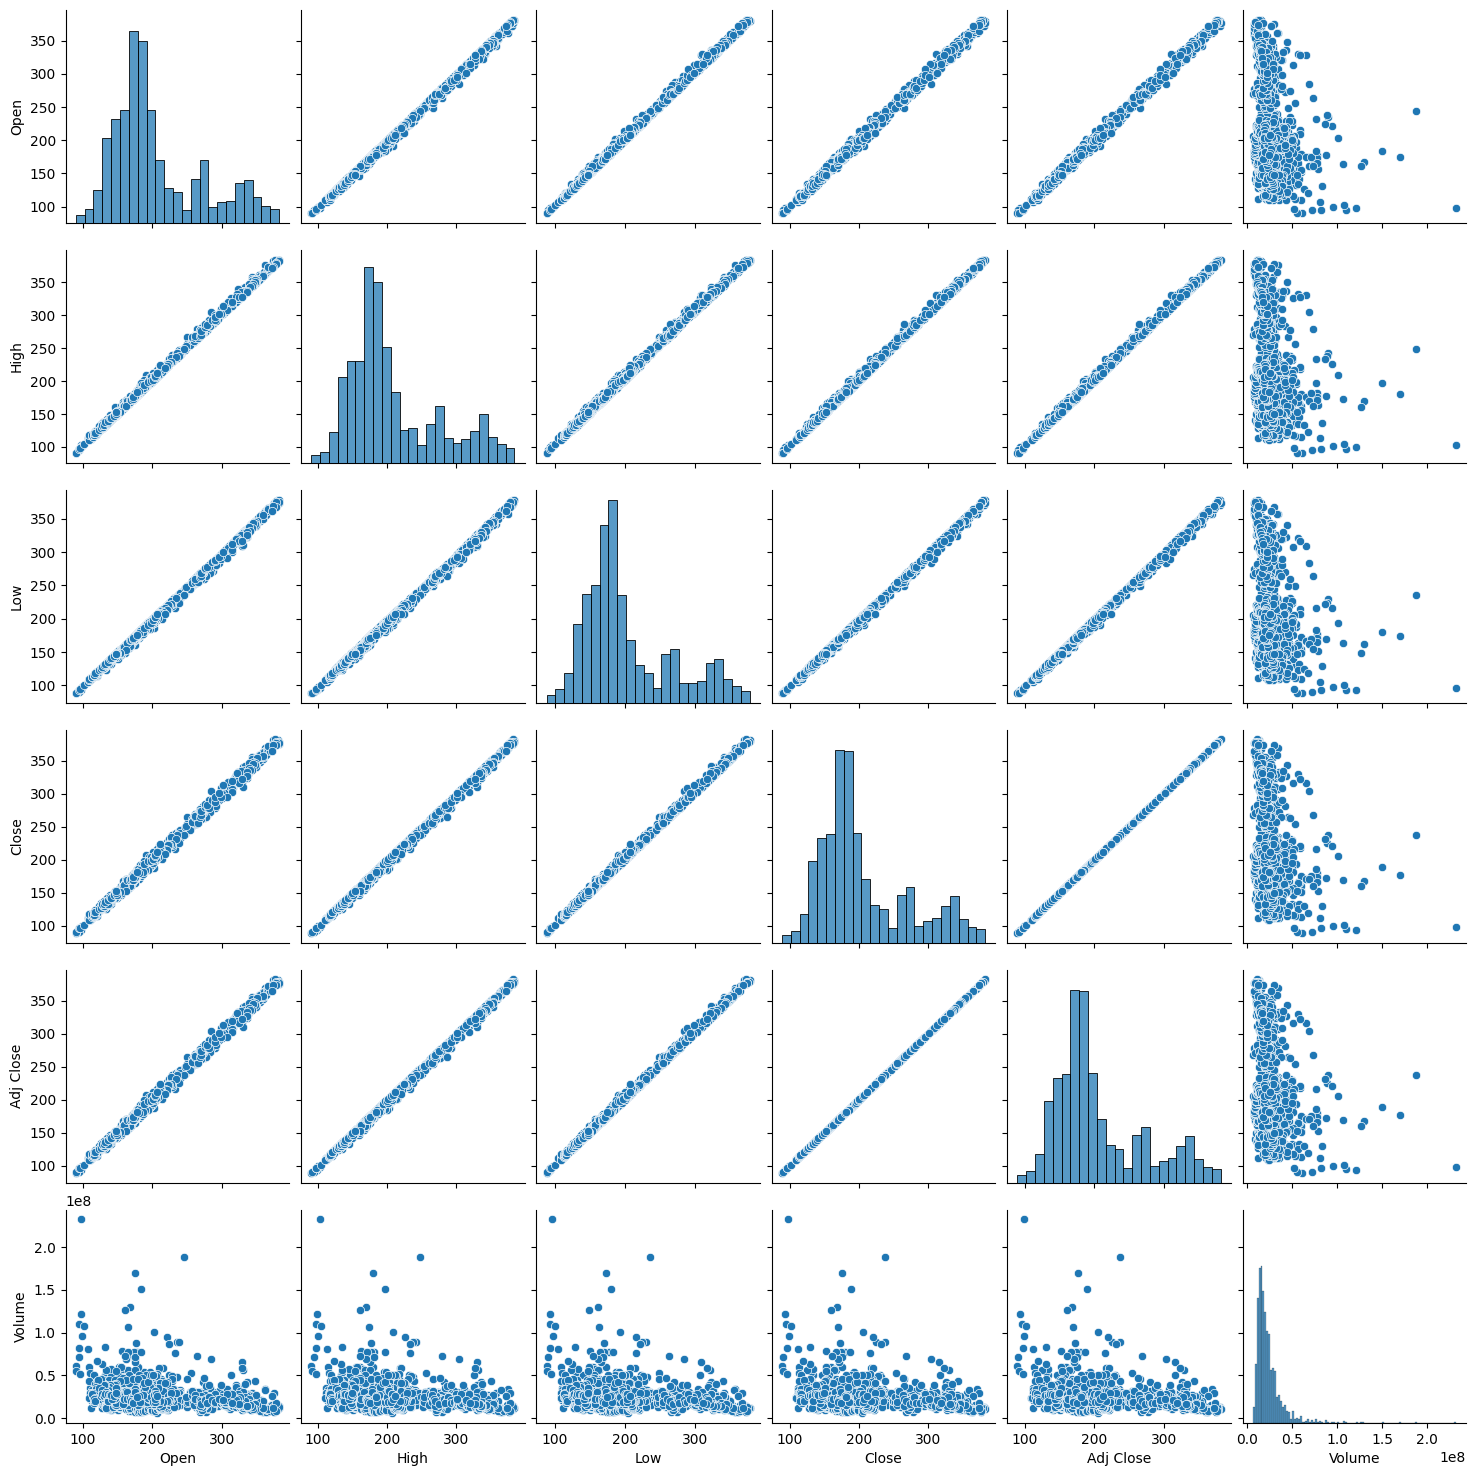

In [232]:
sns.pairplot(df)

In [233]:
import plotly.express as px

In [234]:
fig = px.scatter(df, x='Date', y='Adj Close')
fig.show()

## Data Modelling

In [235]:
# Taking only the 'Adj Close'=> Adjusted close column
df_temp = pd.DataFrame(df['Adj Close'])
df_temp

,Adj Close
0,116.860001
1,118.690002
2,120.669998
3,123.410004
4,124.900002
...,...
1567,202.839996
1568,200.679993
1569,205.350006
1570,207.839996


In [236]:
df_temp['value'] = df_temp['Adj Close']
df_temp = df_temp.drop(['Adj Close'], axis=1)
df_temp

,value
0,116.860001
1,118.690002
2,120.669998
3,123.410004
4,124.900002
...,...
1567,202.839996
1568,200.679993
1569,205.350006
1570,207.839996


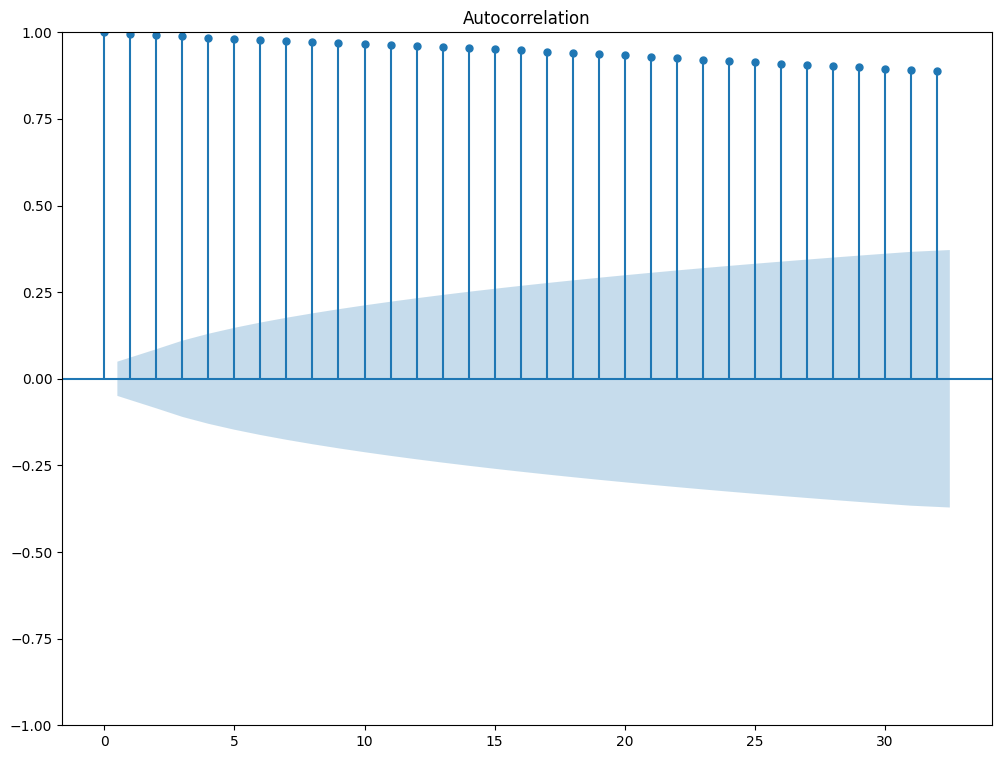

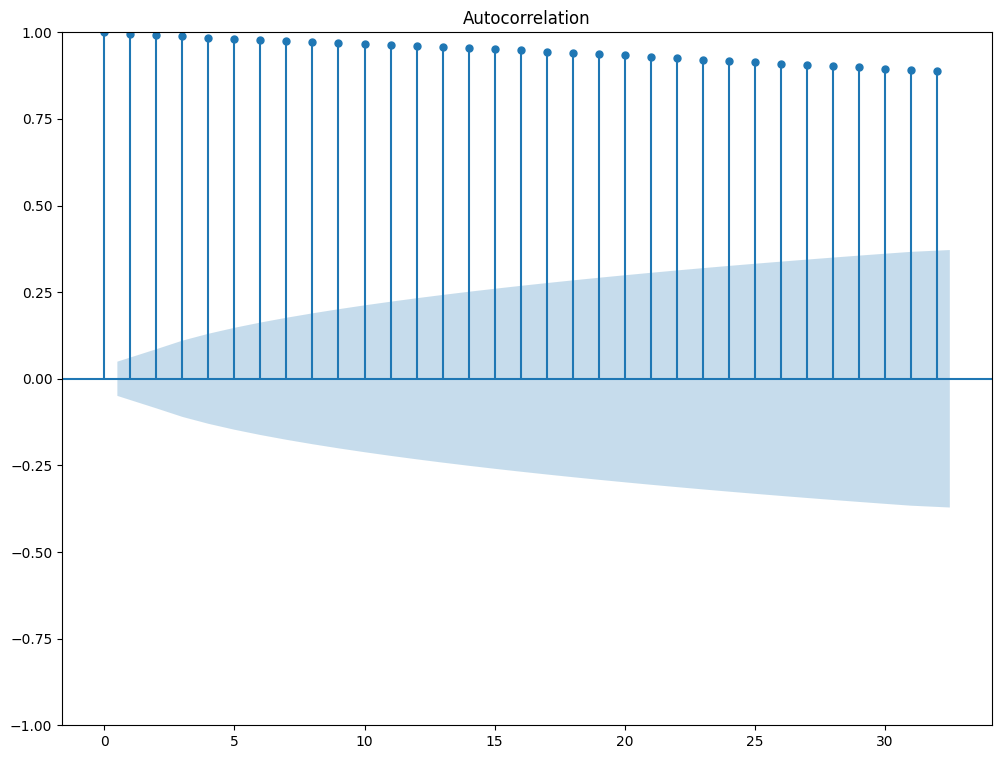

In [237]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_temp.value)

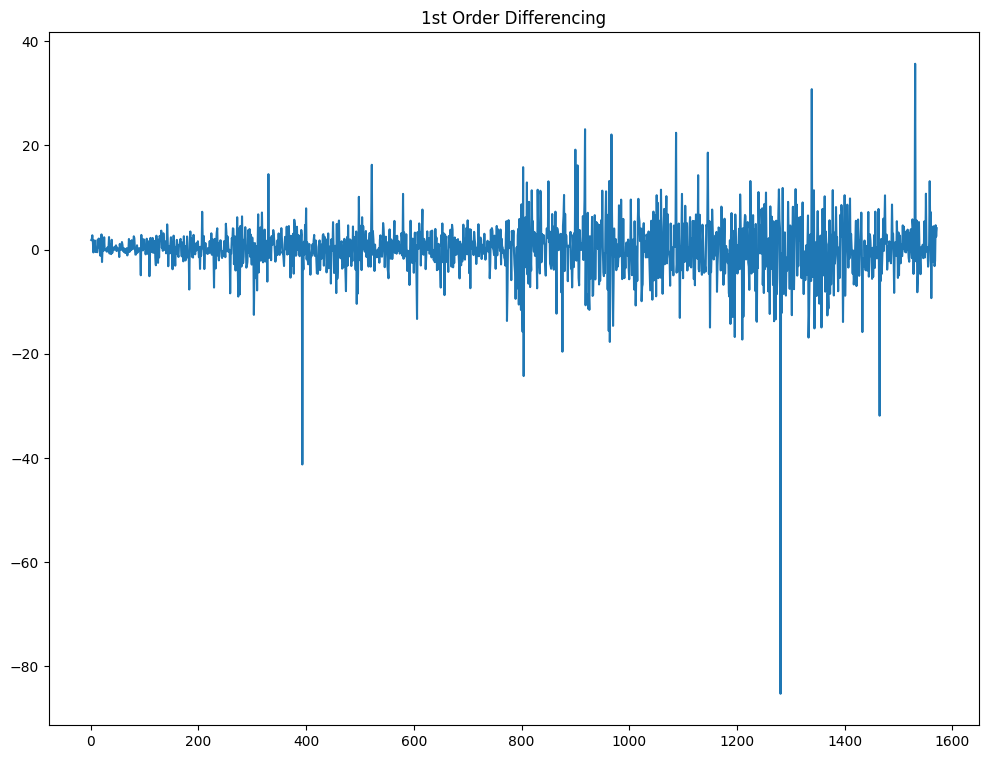

In [238]:
# plotting the first order differencing
plt.figure()
plt.title('1st Order Differencing')
plt.plot(df_temp.value.diff())
plt.show()

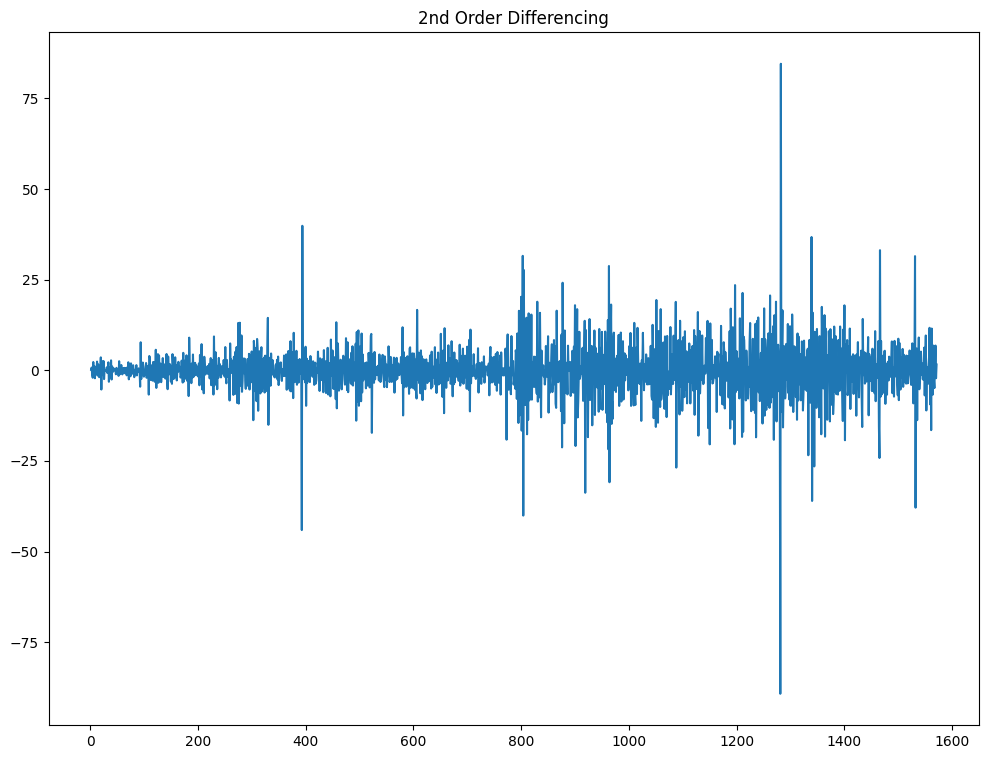

In [239]:
# plotting the first order differencing
plt.figure()
plt.title('2nd Order Differencing')
plt.plot(df_temp.value.diff().diff())
plt.show()

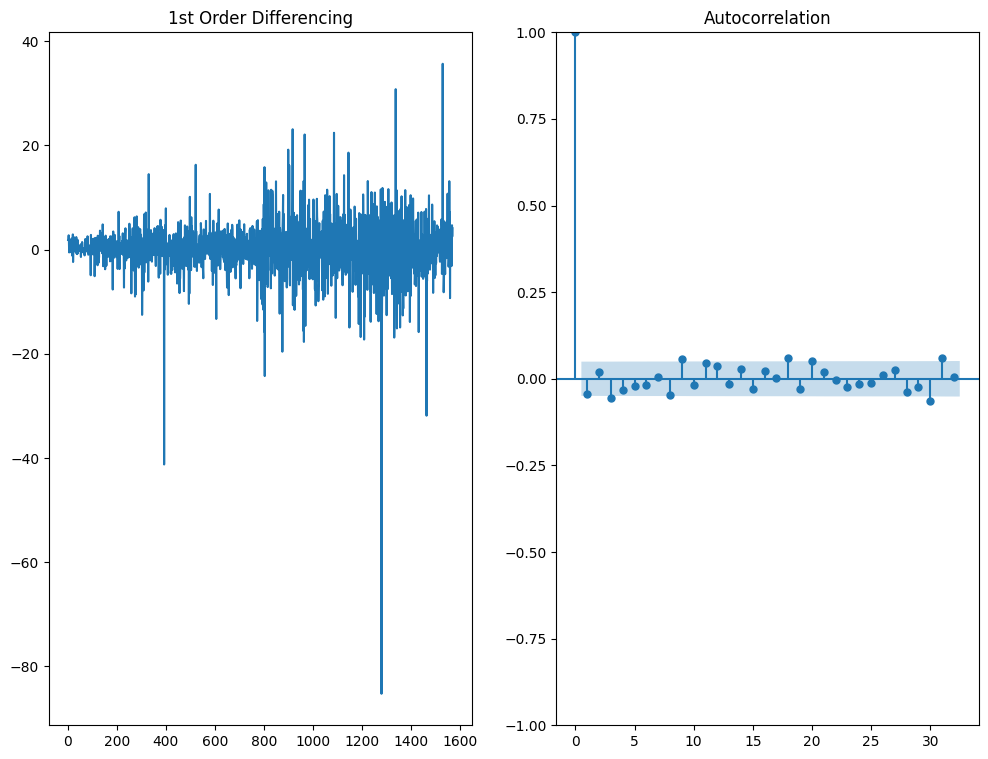

In [240]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df_temp.value.diff().dropna(), ax=ax2)
plt.show()

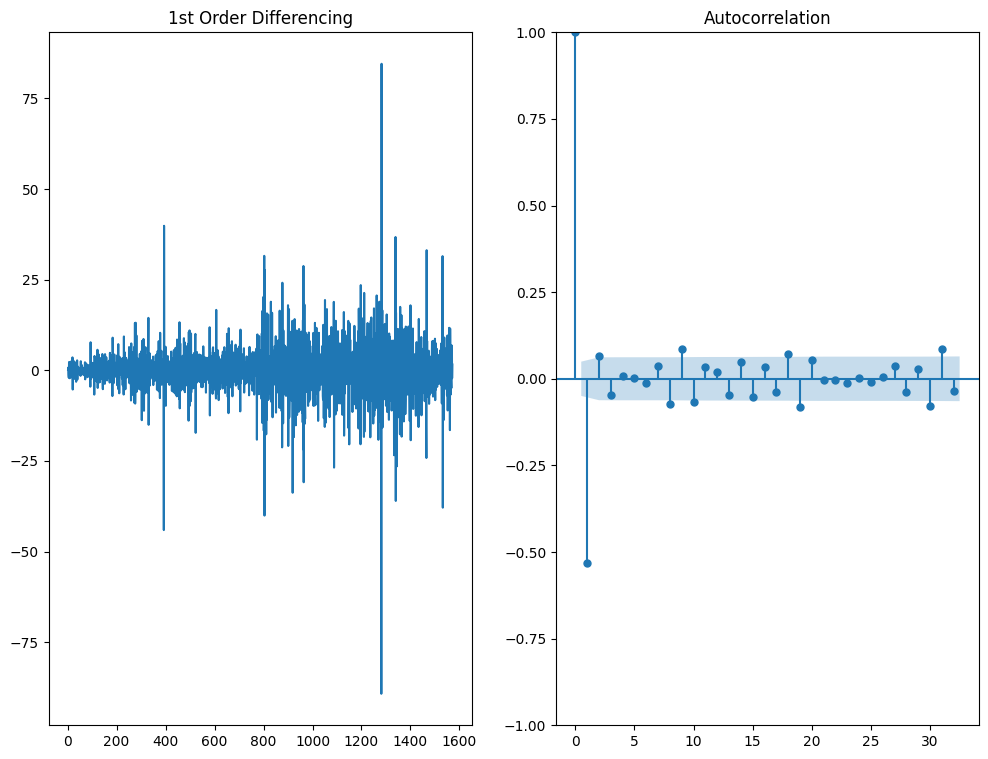

In [241]:
# Also trying for d=2
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df_temp.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [281]:
# Calculating p-values using Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_temp.value.dropna())
print('p-value: ', result[1])

result = adfuller(df_temp.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df_temp.value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.3825466718009699
p-value:  0.0
p-value:  1.1493327459903003e-28


#### By the above values of p, we will consider differencing("d") as 1

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



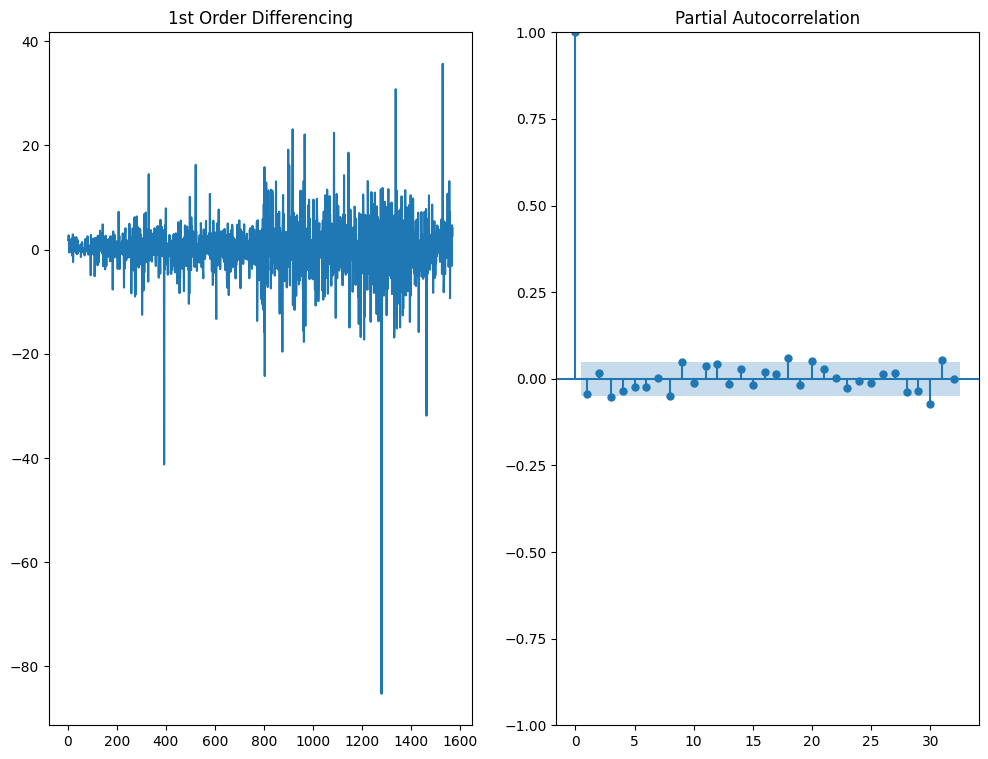

In [243]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(df_temp.value.diff().dropna(), ax=ax2)
plt.show()

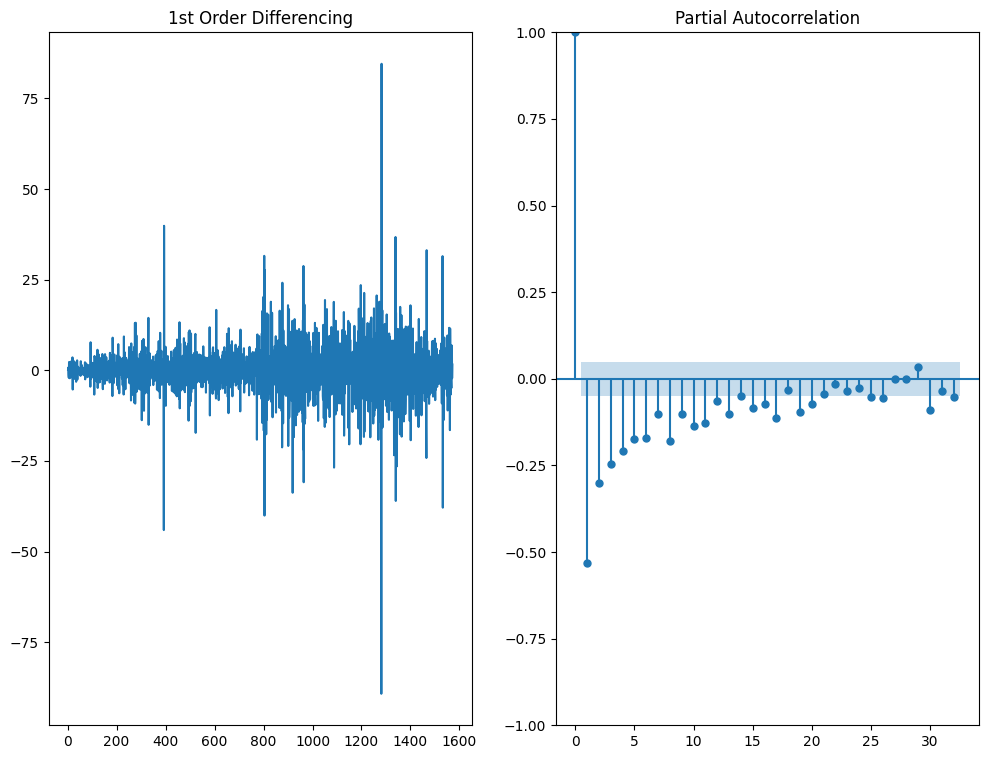

In [244]:
# Also trying for d=2
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_temp.value.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df_temp.value.diff().diff().dropna(), ax=ax2)
plt.show()

In both the plots, we see the 1st lag is the most significant. Thus, we consider “p” to be 1.

Finally, “q” can be estimated similarly by looking at the ACF plot instead of the PACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be set to 1.

Thus, our final ARIMA model can be defined as ARIMA(p=1, d=1,q= 1).

In [245]:
from statsmodels.tsa.arima.model import ARIMA

In [282]:
df_train = df2[df2.Date < "2021"]
df_valid = df2[df2.Date >= "2021"]

In [284]:
arima_model = ARIMA(df_train.Close, order=(1,1,1))
model = arima_model.fit()

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [285]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2865.046
Date:                Thu, 06 Apr 2023   AIC                           5736.092
Time:                        00:01:34   BIC                           5750.833
Sample:                             0   HQIC                          5741.693
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6348      0.112     -5.692      0.000      -0.853      -0.416
ma.L1          0.5564      0.118      4.702      0.000       0.324       0.788
sigma2        17.4270      0.279     62.508      0.000      16.881      17.973
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8337.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

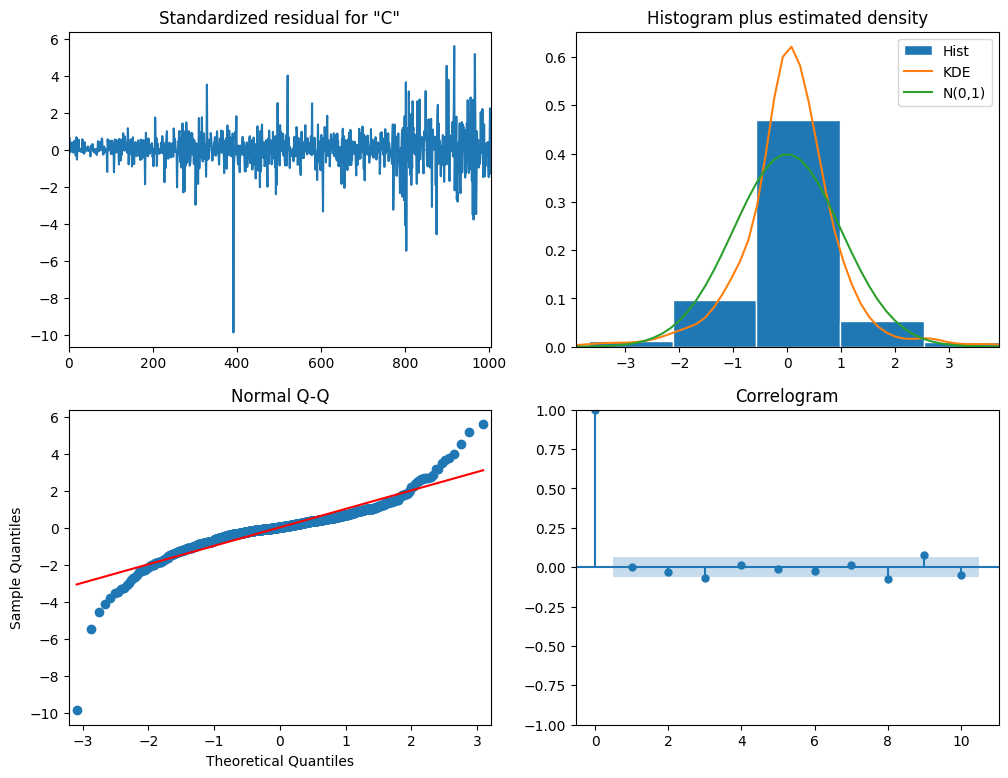

In [286]:
model.plot_diagnostics()
plt.show()

In [287]:
# Make predictions on validation set
predictions = model.predict(start=len(df_train), end=len(df_train)+len(df_valid)-1, dynamic=False)

# Calculate performance metrics
mae1 = mean_absolute_error(df_valid.Close, predictions)
mse1 = mean_squared_error(df_valid.Close, predictions)
rmse1 = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error: {mae1:.2f}")
print(f"Mean Squared Error: {mse1:.2f}")
print(f"Root Mean Squared Error: {rmse1:.2f}")


Mean Absolute Error: 79.05
Mean Squared Error: 8055.13
Root Mean Squared Error: 7.29


/Users/abhilasha/Desktop/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



### Preparing dataset for analysis before Prophet model

In [288]:
from statsmodels.graphics.tsaplots import plot_acf

In [289]:
df2 = df.copy()

In [290]:
df2.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200


In [291]:
df2.Date = pd.to_datetime(df2.Date, format="%Y-%m-%d")
df2["month"] = df2.Date.dt.month
df2["week"] = df2.Date.dt.week
df2["day"] = df2.Date.dt.day
df2["day_of_week"] = df2.Date.dt.dayofweek
df2.fillna(df2.mean(), inplace=True)

df2.set_index("Date", drop=False, inplace=True)
df2.head()

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1840816047.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1840816047.py:6: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Date,Open,High,Low,Close,Adj Close,Volume,month,week,day,day_of_week
Date,,,,,,,,,,,
2017-01-03,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,1,1,3,1
2017-01-04,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,1,1,4,2
2017-01-05,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,1,1,5,3
2017-01-06,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,1,1,6,4
2017-01-09,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,1,2,9,0


In [292]:
# dataframe Moving Average for weeks 4, 16, 28, 40, 52 

df_ma = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
df_ma['Close'] = df2['Close'].resample('W').mean()

# calculating moving averge
df_ma['weeks_4'] = df_ma['Close'].rolling(window = 4, min_periods = 1).mean()
df_ma['weeks_16'] = df_ma['Close'].rolling(window = 16, min_periods = 1).mean()
df_ma['weeks_28'] = df_ma['Close'].rolling(window = 28, min_periods = 1).mean()
df_ma['weeks_40'] = df_ma['Close'].rolling(window = 40, min_periods = 1).mean()
df_ma['weeks_52'] = df_ma['Close'].rolling(window = 52, min_periods = 1).mean()

df_ma

,Close,weeks_4,weeks_16,weeks_28,weeks_40,weeks_52
Date,,,,,,
2017-01-08,119.907501,119.907501,119.907501,119.907501,119.907501,119.907501
2017-01-15,126.059999,122.983750,122.983750,122.983750,122.983750,122.983750
2017-01-22,127.595001,124.520834,124.520834,124.520834,124.520834,124.520834
2017-01-29,130.947995,126.127624,126.127624,126.127624,126.127624,126.127624
2017-02-05,131.269998,128.968248,127.156099,127.156099,127.156099,127.156099
...,...,...,...,...,...,...
2023-03-05,175.535999,176.464373,139.025406,137.872696,147.948738,161.075577
2023-03-12,183.115997,176.584373,143.369781,138.569839,147.702137,160.908269
2023-03-19,194.641998,181.175373,148.582562,139.771767,147.837637,160.779769


In [293]:
import altair as alt

In [294]:
# set base for creat custom legend and plots
base = alt.Chart(df2).transform_calculate(
legend1="'Close prices of stocks'",
legend2="'Open price of stock'",

)
scale = alt.Scale(domain=["Close prices of stocks", "Open price of stock"], range=['blue', 'violet', ])

# timeseries plot of close prices of stocks in blue colour
line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries plot of open prices of stocks in blue colour
line2 = base.mark_line(color='violet').encode(
x = 'Date:T',
y = 'Open:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + text).properties(
    title={"text":['Timeseries Plot of Close and Open Price of Stock Over Year'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [295]:
# set base for creat custom legend and plots
base = alt.Chart(df2).transform_calculate(
legend1="'High prices of stocks'",
legend2="'Low price of stock'",

)
scale = alt.Scale(domain=["High prices of stocks", "Low price of stock"], range=['red', 'green', ])

# timeseries plot of High prices of stocks red colour
line1 = base.mark_line(color='red').encode(
x = 'Date:T',
y = 'High:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

# timeseries between low prices of stocks green colour

line2 = base.mark_line(color='green').encode(
x = 'Date:T',
y = 'Low:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + text).properties(
    title= {"text":['Timeseries Plot of High and Price of Stock Over Year'],
                   "fontSize":15,
                   "fontWeight": 'bold',
                   "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [296]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Close price'",
legend2="'MA of weeks 4'",
legend3="'MA of weeks 16'",
legend4="'MA of weeks 28'",
legend5="'MA of weeks 40'",
legend6="'MA of weeks 52'"
)
scale = alt.Scale(domain=["Close price", 
                          "MA of weeks 4",
                          "MA of weeks 16",
                          "MA of weeks 28",
                          "MA of weeks 40",
                          "MA of weeks 52"], 
                  range=['blue', 
                         'gold', 
                         'darkgreen', 
                         'slategray', 
                         'deeppink',
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='gold').encode(
x = 'Date:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

line3 = base.mark_line(color='darkgreen').encode(
x = 'Date:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)

line4 = base.mark_line(color='slategray').encode(
x = 'Date:T',
y = 'weeks_28:Q',
color=alt.Color('legend4:N', scale=scale, title='')
)

line5 = base.mark_line(color='deeppink').encode(
x = 'Date:T',
y = 'weeks_40:Q',
color=alt.Color('legend5:N', scale=scale, title='')
)

line6 = base.mark_line(color='firebrick').encode(
x = 'Date:T',
y = 'weeks_52:Q',
color=alt.Color('legend6:N', scale=scale, title='')
)

text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3 + line4 + line5 + line6 +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Weeks'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

In [297]:
# we will here use resample.Resampler.asfreq() function. Because it also provide us option of padding (backwardfill/forwardfill missing values "not NANs" ). 
# source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.asfreq.html We are using this, because on saturdays and sundays, market remains closed, so friday's close price could be forwarded in closing days.
stock_day = df2.asfreq('D', method ='pad')

df_rw = pd.DataFrame()
df_rw['Close'] = df2['Close']
df_rw['day_10'] = df_rw['Close'].rolling(window = 10, min_periods = 1).mean()
df_rw['day_50'] = df_rw['Close'].rolling(window = 50, min_periods = 1).mean()
df_rw

,Close,day_10,day_50
Date,,,
2017-01-03,116.860001,116.860001,116.860001
2017-01-04,118.690002,117.775002,117.775002
2017-01-05,120.669998,118.740000,118.740000
2017-01-06,123.410004,119.907501,119.907501
2017-01-09,124.900002,120.906001,120.906001
...,...,...,...
2023-03-27,202.839996,200.521999,173.837198
2023-03-28,200.679993,201.187997,175.111198
2023-03-29,205.350006,201.947998,176.510999


In [298]:
# set base for creat custom legend and plots
base = alt.Chart(df_ma.reset_index()).transform_calculate(
legend1="'Close price'",
legend2="'MA of day 10'",
legend3="'MA of day 50'",

)
scale = alt.Scale(domain=["Close price", 
                          "MA of day 10",
                          "MA of day 50",], 
                  range=['blue',   
                         'pink', 
                         'firebrick'])

line1 = base.mark_line(color='blue').encode(
x = 'Date:T',
y = 'Close:Q',
color=alt.Color('legend1:N', scale=scale, title=''),
)

line2 = base.mark_line(color='pink').encode(
x = 'Date:T',
y = 'weeks_4:Q',
color=alt.Color('legend2:N', scale=scale, title='')
)

line3 = base.mark_line(color='firebrick').encode(
x = 'Date:T',
y = 'weeks_16:Q',
color=alt.Color('legend3:N', scale=scale, title='')
)


text = line1.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)   


(line1 + line2 + line3  +text).properties(
    title={"text":['Moving Average Plot of Stock Over the Days'],
           "fontSize":15,
           "fontWeight": 'bold',
           "font":'Courier New',},
    height=500, width=600
).interactive()

alt.LayerChart(...)

### autocorrelation

In [299]:
from statsmodels.tsa.stattools import acf, pacf
# data for partial autocorrelation plot
lags = 50
source = pd.DataFrame({
    'lags': list(range(lags+1)),
    'PACF': pacf(df2["Close"], nlags=lags)
})

# ploting partial autocorrelation plot https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html )
bar = alt.Chart(source).mark_bar().encode(
    x='lags:Q',
    y='PACF:Q',

)
circle = alt.Chart(source).mark_circle(size = 50, color='red').encode(
    x='lags:Q',
    y='PACF:Q',

)
text = bar.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
)  

(bar + circle + text).properties(
    title={"text":['Partial AutoCorrelation Plot With 50 Lags of Stocks'],
                   "fontSize":15,
                   "fontWeight": 'bold',
                   "font":'Courier New',},
    height=500, width=600
)

alt.LayerChart(...)

### FB Prophet

In [300]:
df_train = df2[df2.Date < "2021"]
df_valid = df2[df2.Date >= "2021"]

from prophet import Prophet
model = Prophet()
model.fit(df_train[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

forecast = model.predict(df_valid[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

00:02:00 - cmdstanpy - INFO - Chain [1] start processing
00:02:00 - cmdstanpy - INFO - Chain [1] done processing


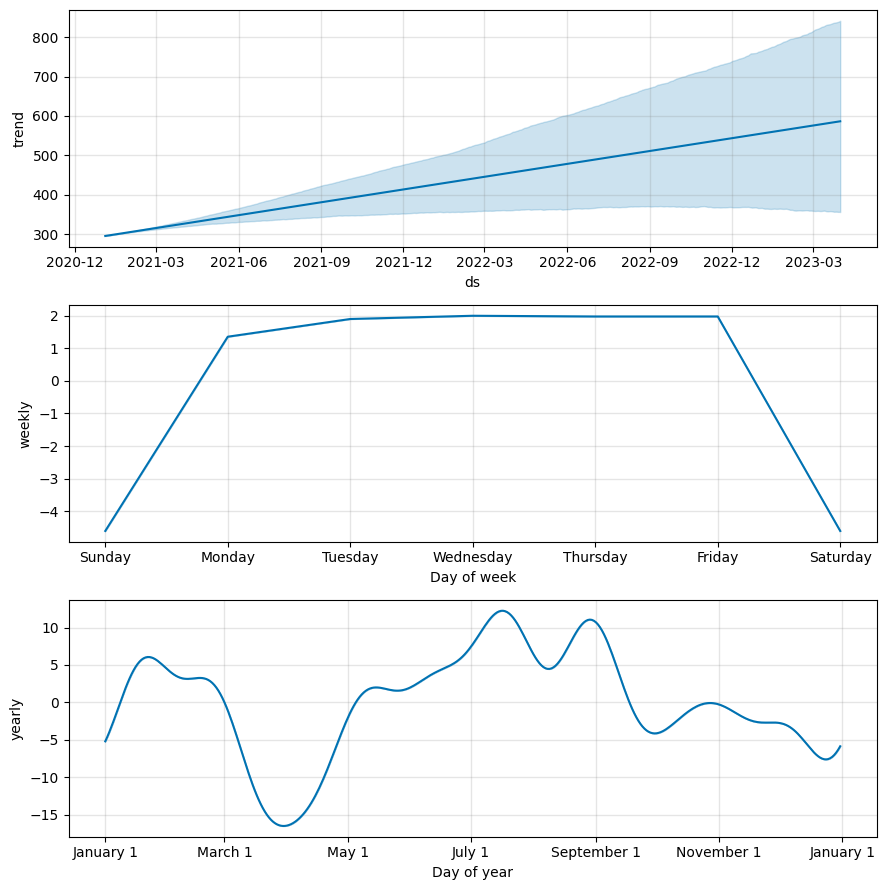

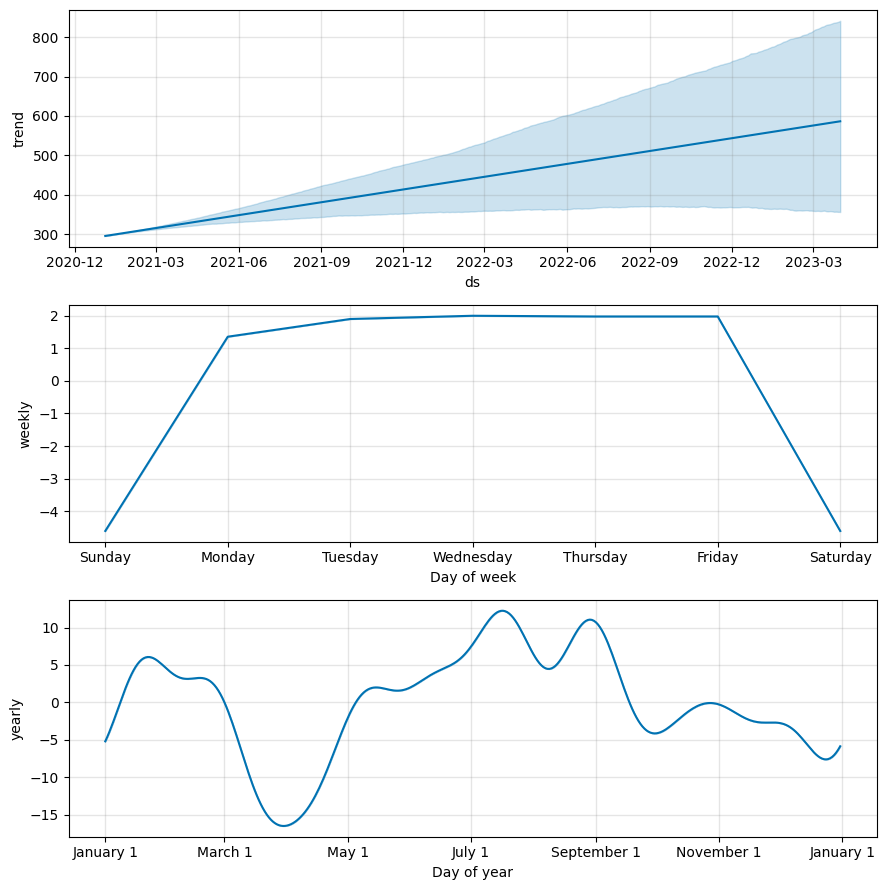

In [270]:
model.plot_components(forecast)

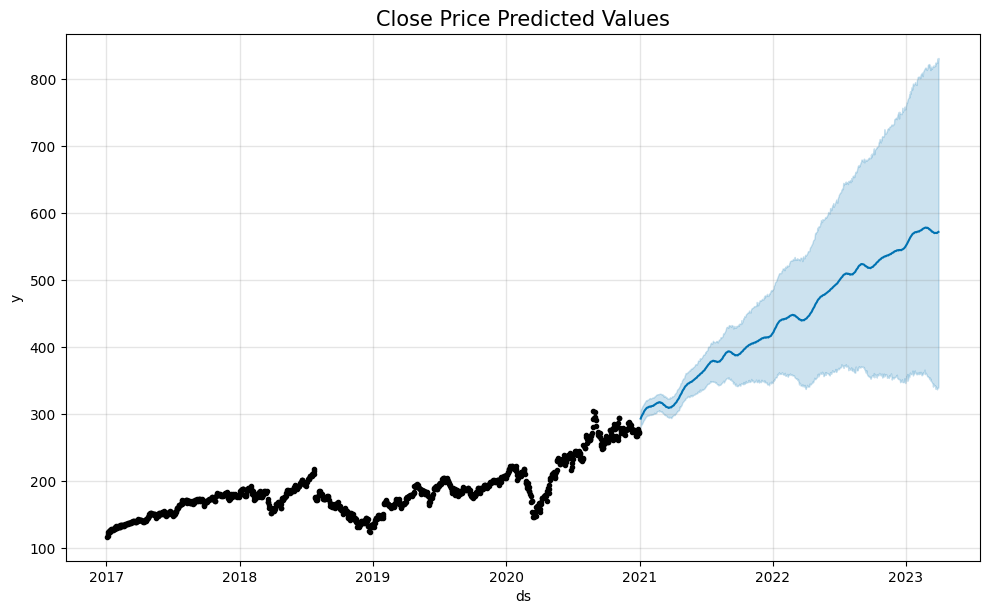

In [301]:
model.plot(forecast)
plt.title('Close Price Predicted Values', fontsize=15)
plt.show()

In [302]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# calculate performance metrics
actual = df_valid['Close'].values
predicted = forecast['yhat'].values

mae2 = mean_absolute_error(actual, predicted)
mse2 = mean_squared_error(actual, predicted)
rmse2 = np.sqrt(mse)

# print out the metrics
print(f'Mean Absolute Error: {mae2:.2f}')
print(f'Mean Squared Error: {mse2:.2f}')
print(f'Root Mean Squared Error: {rmse2:.2f}')


Mean Absolute Error: 200.22
Mean Squared Error: 65444.78
Root Mean Squared Error: 7.29


### Random Forest - 30 Day Window Prediction

In [273]:
X = []
y_true = []
dates = []

window_size = 30

for i in range(0, len(df2)-window_size, window_size):
    X.append(df2['Close'][i:i+window_size])
    y_true.append(df2['Close'][i+window_size])
    
    dates.append(df2['Date'][i+window_size])

In [274]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=3, random_state=0)

regr.fit(X, y_true)

y_pred = regr.predict(X)

In [275]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true, y_pred)

4.756524599280701

In [276]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=y_true, mode='lines', name='y_true'))

fig.add_trace(go.Scatter(x=dates, y=y_pred, mode='lines', name='y_pred'))

fig.show()

In [280]:
# Calculate the performance metrics
mae3 = mean_absolute_error(y_true, y_pred)
mse3 = mean_squared_error(y_true, y_pred)
rmse3 = np.sqrt(mse)

# Plot the performance metrics
# print out the metrics
print(f'Mean Absolute Error: {mae3:.2f}')
print(f'Mean Squared Error: {mse3:.2f}')
print(f'Root Mean Squared Error: {rmse3:.2f}')

Mean Absolute Error: 4.76
Mean Squared Error: 53.16
Root Mean Squared Error: 7.29


In [310]:
# future_predictions = df2[['Date','Close']][-1*700:]
# future_predictions.reset_index(drop=True, inplace = True)


# future_predictions['Date']= pd.to_datetime(future_predictions['Date'])

# for pred in range(90):
    
#     future_predictions = future_predictions.append(
#         {
#             'Date' : future_predictions.at[len(future_predictions)-1,'Date'] + timedelta(days=1), 
#             'Close' : regr.predict([future_predictions['Close'][-1*window_size:]])[0]
#         }, 
#         ignore_index=True
#     )

    
# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_trace(go.Scatter(x=df2['Date'], y=df2['Close'], mode='lines', name='Close'))

# fig.add_trace(go.Scatter(x=future_predictions['Date'], y=future_predictions['Close'], mode='lines', name='Prediction'))

# fig.show()

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is depreca

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is depreca

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/p2/5jk7kmz53vq9d96v6kkyckl40000gn/T/ipykernel_35605/1725426661.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [308]:
performance = {'Model': ['ARIMA','Prophert','Random Forest'],'MAE': [mae1,mae2,mae3],
        'MSE': [mse1,mse2,mse3],
        'RMSE': [rmse1,rmse2,rmse3]}

output = pd.DataFrame(performance)

In [309]:
output

,Model,MAE,MSE,RMSE
0,ARIMA,79.051793,8055.130022,7.290883
1,Prophert,200.224712,65444.776131,7.290883
2,Random Forest,4.756525,53.156975,7.290883


### Root Mean Squared Error (RMSE) is the square root of the MSE, which means it measures the same thing as the MSE but on the same scale as the original data. Since the RMSE is calculated from the same MSE values for all models, it will be the same across all models, even if the MAE and MSE are different.

In summary, the MAE and MSE can be different for different models due to differences in the distribution of errors, while the RMSE will be the same for all models since it is calculated from the same MSE values.